In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ConfusionMatrix

In [51]:
# Fetch diabetes dataset from OpenMl
diabetes_data = fetch_openml('Diabetes', version=6, parser='auto')

In [52]:
# Get dataset as pandas dataframe
diabetes_df = diabetes_data.data

# Data Study

In [53]:
# Visualize data
display(diabetes_df)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [54]:
# See some data statistics
display(diabetes_df.describe())

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [55]:
# See missing values
print(diabetes_df.isnull().sum())

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64


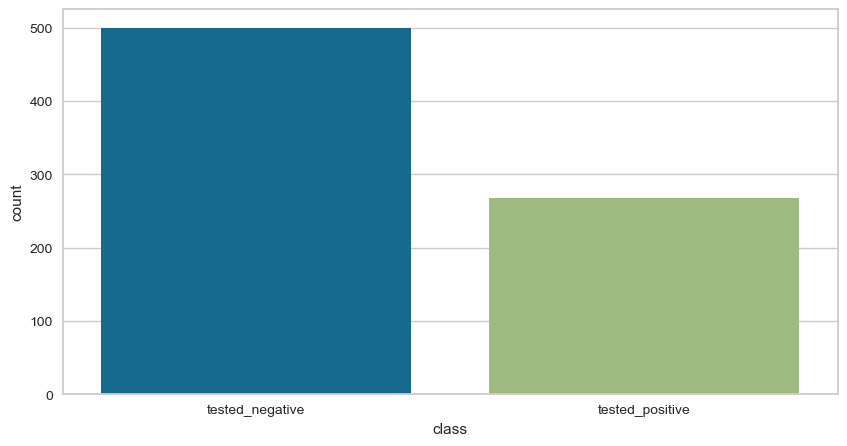

In [56]:
# Visualize class balance
plt.figure(1, figsize=(10, 5))
sns.countplot(x=diabetes_df['class'])
plt.show()

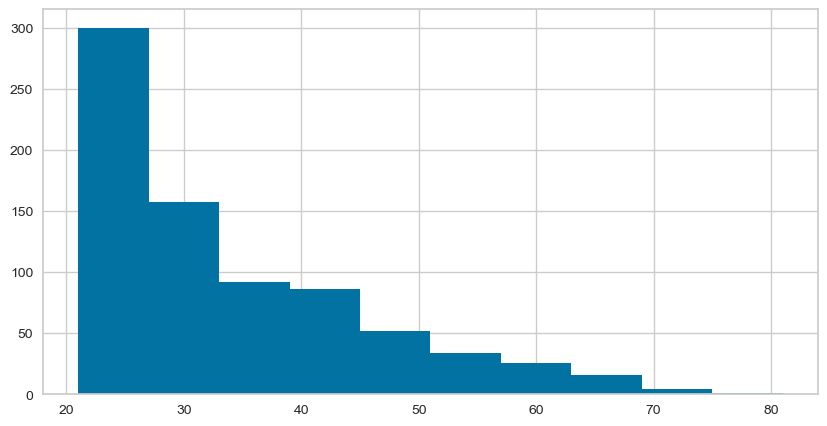

In [57]:
# Visualize dataset ages
plt.figure(2, figsize=(10, 5))
plt.hist(x=diabetes_df['age'])
plt.show()

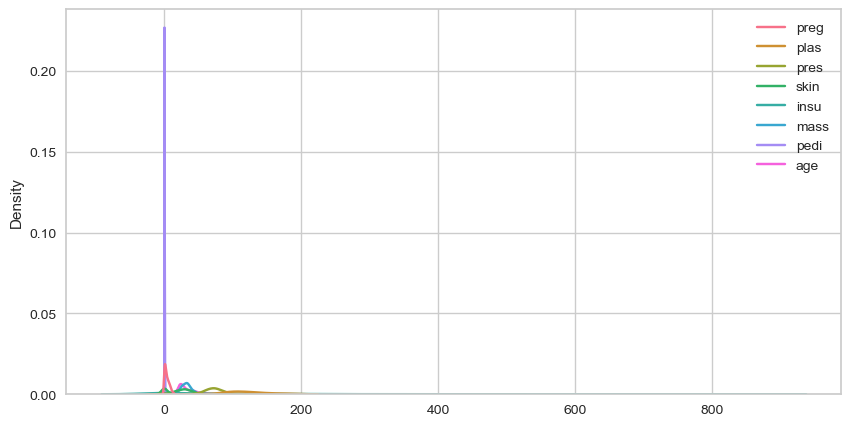

In [58]:
# Visualize data density
plt.figure(3, figsize=(10, 5))
sns.kdeplot(diabetes_df)
plt.show()

# Create subsets of train and test

In [59]:
# Splitting the data, between features and target
X = diabetes_df.iloc[:,:8].values
y = diabetes_df.iloc[:,8].values

In [60]:
# Arrays dimensions
print(f'X shape:{X.shape}\nY shape:{y.shape}')

X shape:(768, 8)
Y shape:(768,)


In [61]:
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

# Train model 

In [62]:
# initialize model
clf_lg = LogisticRegression()
#Normalize train data ->Z-score
X_train = scaler.fit_transform(X_train)
# train model
clf_lg.fit(X_train, y_train)

LogisticRegression()

# Model´s accuracy 

In [63]:
#Normalize test data ->Z-score
X_test = scaler.fit_transform(X_test)
# Model mean accuracy
print(f'Model score :{clf_lg.score(X_test, y_test)}')

Model score :0.7077922077922078


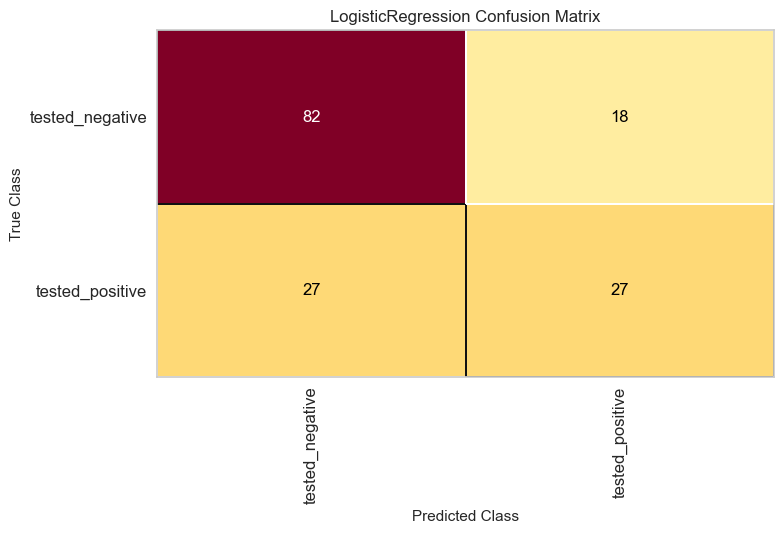

                 precision    recall  f1-score   support

tested_negative       0.75      0.82      0.78       100
tested_positive       0.60      0.50      0.55        54

       accuracy                           0.71       154
      macro avg       0.68      0.66      0.67       154
   weighted avg       0.70      0.71      0.70       154



In [64]:
cm = ConfusionMatrix(clf_lg)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();
#Get model predicted class´s values
y_pred = clf_lg.predict(X_test)
print(classification_report(y_test, y_pred))

#### Results HoldOut cross-validation, Z-Score normalization: 70.78%

# Hyperparameters optimization

In [70]:
# Hyperparameters to optimize
params = {'penalty':('l1', 'l2', 'elasticnet', 'None'),
          'C':[0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1., 10.],
          'solver':('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'),
          'multi_class':('ovr','ovo','auto')}
# Classification model
model = LogisticRegression(max_iter=150)
# Cross-validation method
skf = StratifiedKFold(n_splits=5, shuffle=True)

clf = GridSearchCV(model, params, cv=skf)

In [71]:
clf_fit = clf.fit(X_train,y_train)

In [72]:
best_estimator = clf_fit.best_estimator_

In [73]:
#Normalize test data ->Z-score
X_test = scaler.fit_transform(X_test)
# Model mean accuracy
print(f'Model score :{best_estimator.score(X_test, y_test)}')

Model score :0.7142857142857143


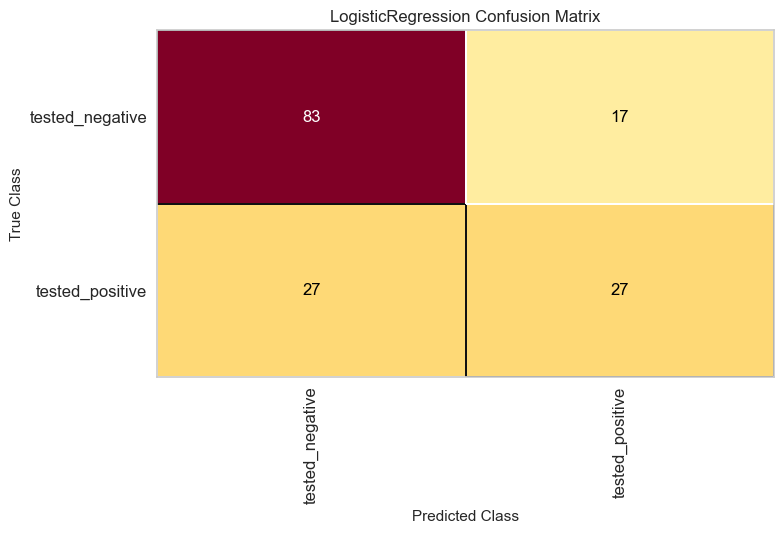

                 precision    recall  f1-score   support

tested_negative       0.75      0.83      0.79       100
tested_positive       0.61      0.50      0.55        54

       accuracy                           0.71       154
      macro avg       0.68      0.67      0.67       154
   weighted avg       0.71      0.71      0.71       154



In [74]:
cm = ConfusionMatrix(best_estimator)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();
#Get model predicted class´s values
y_pred = best_estimator.predict(X_test)
print(classification_report(y_test, y_pred))

# Final precision : 71.43%